Epoch 1/50
86/86 [==============================] - 3s 8ms/step - loss: 0.0103
Epoch 2/50
86/86 [==============================] - 1s 8ms/step - loss: 7.0307e-05
Epoch 3/50
86/86 [==============================] - 1s 8ms/step - loss: 6.2139e-05
Epoch 4/50
86/86 [==============================] - 1s 8ms/step - loss: 6.1148e-05
Epoch 5/50
86/86 [==============================] - 1s 8ms/step - loss: 6.3062e-05
Epoch 6/50
86/86 [==============================] - 1s 8ms/step - loss: 5.7631e-05
Epoch 7/50
86/86 [==============================] - 1s 8ms/step - loss: 6.3222e-05
Epoch 8/50
86/86 [==============================] - 1s 10ms/step - loss: 5.6358e-05
Epoch 9/50
86/86 [==============================] - 1s 9ms/step - loss: 6.2518e-05
Epoch 10/50
86/86 [==============================] - 1s 8ms/step - loss: 5.7507e-05
Epoch 11/50
86/86 [==============================] - 1s 8ms/step - loss: 6.1534e-05
Epoch 12/50
86/86 [==============================] - 1s 8ms/step - loss: 5.4855e-05
Epoc

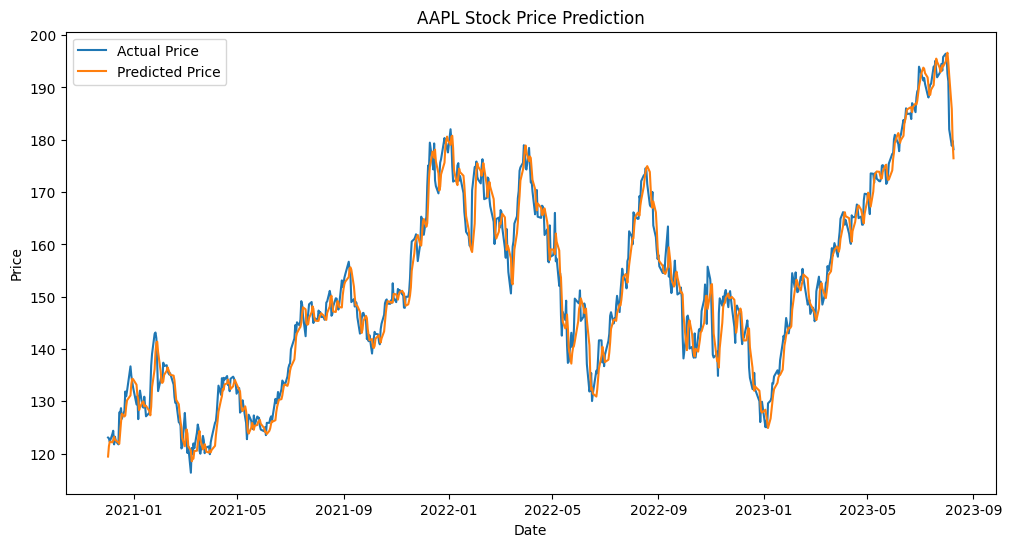

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Fetch historical stock price data of Apple Inc from Yahoo Finance
stock_symbol = "AAPL"
start_date = "2010-01-01"
end_date = "2023-08-10"
data = yf.download(stock_symbol, start=start_date, end=end_date, progress=False)

# Prepare the data
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
close_prices_scaled = scaler.fit_transform(close_prices)

# Split the data into training and testing sets
train_size = int(len(close_prices) * 0.8)
train_data = close_prices_scaled[:train_size]
test_data = close_prices_scaled[train_size:]

# Create sequences for the LSTM model
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 10
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict stock prices
predicted_scaled = model.predict(x_test)
predicted = scaler.inverse_transform(predicted_scaled)

# Plot the results on the graph
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size+seq_length:], close_prices[train_size+seq_length:], label="Actual Price")
plt.plot(data.index[train_size+seq_length:], predicted, label="Predicted Price")
plt.legend()
plt.title(f"{stock_symbol} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()